# Data Preprocessing Tools

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Data.csv')
# Skapar matrisen av funktioner (X) och den beroende variabeln (y)
X = dataset.iloc[:, :-1].values # Alla kolumner utom den sista som funktioner (oberoende variabler)
y = dataset.iloc[:, -1].values  # Den sista kolumnen som den beroende variabeln (målvariabeln)

In [4]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [6]:
from sklearn.impute import SimpleImputer

# Skapar en instans av SimpleImputer
# Strategi: Ersätt saknade värden (NaN) med medelvärdet av respektive kolumn
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Använder imputer för att "lära sig" medelvärdet för kolumnerna 1 och 2 i X (dvs. andra och tredje kolumnen, index börjar på 0)
imputer.fit(X[:, 1:3])

# Ersätter saknade värden i kolumnerna 1 och 2 med medelvärdet som beräknades i föregående steg
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [7]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data

### Encoding the Independent Variable

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Skapar en ColumnTransformer som applicerar OneHotEncoder på kolumn 0 (landsnamnen) i X
# 'encoder' är namnet vi ger denna transformation, och [0] betyder att vi enbart vill transformera den första kolumnen
# remainder='passthrough' innebär att alla andra kolumner förblir oförändrade
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# Använder ColumnTransformer för att transformera X och omvandlar resultatet till en numpy-array
# Detta gör att alla kategoriska värden i den första kolumnen ersätts med nya kolumner som representerar varje kategori som 1 eller 0 (one-hot encoded)
X = np.array(ct.fit_transform(X))

# i detta fallet blir det typ så här 
'''
[[1.0 0.0 0.0 44.0 72000.0]    # France: [1, 0, 0]
 [0.0 1.0 0.0 27.0 48000.0]    # Spain: [0, 1, 0]
 [0.0 0.0 1.0 30.0 54000.0]    # Germany: [0, 0, 1]
 [0.0 1.0 0.0 38.0 61000.0]    # Spain: [0, 1, 0]
 [0.0 0.0 1.0 40.0 63777.78]   # Germany: [0, 0, 1]
 [1.0 0.0 0.0 35.0 58000.0]    # France: [1, 0, 0]
 [0.0 1.0 0.0 38.78 52000.0]   # Spain: [0, 1, 0]
 [1.0 0.0 0.0 48.0 79000.0]    # France: [1, 0, 0]
 [0.0 0.0 1.0 50.0 83000.0]    # Germany: [0, 0, 1]
 [1.0 0.0 0.0 37.0 67000.0]]   # France: [1, 0, 0]
 
 1.0 0.0 0.0 france 
 0.0 1.0 0.0 spain 
 0.0 0.0 1.0 germany 
 
 '''

'\n[[1.0 0.0 0.0 44.0 72000.0]    # France: [1, 0, 0]\n [0.0 1.0 0.0 27.0 48000.0]    # Spain: [0, 1, 0]\n [0.0 0.0 1.0 30.0 54000.0]    # Germany: [0, 0, 1]\n [0.0 1.0 0.0 38.0 61000.0]    # Spain: [0, 1, 0]\n [0.0 0.0 1.0 40.0 63777.78]   # Germany: [0, 0, 1]\n [1.0 0.0 0.0 35.0 58000.0]    # France: [1, 0, 0]\n [0.0 1.0 0.0 38.78 52000.0]   # Spain: [0, 1, 0]\n [1.0 0.0 0.0 48.0 79000.0]    # France: [1, 0, 0]\n [0.0 0.0 1.0 50.0 83000.0]    # Germany: [0, 0, 1]\n [1.0 0.0 0.0 37.0 67000.0]]   # France: [1, 0, 0]\n \n 1.0 0.0 0.0 france \n 0.0 1.0 0.0 spain \n 0.0 0.0 1.0 germany \n \n '

In [9]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [10]:
from sklearn.preprocessing import LabelEncoder # Importerar LabelEncoder från sklearn för att omvandla kategoriska etiketter till siffror

# Skapar en instans av LabelEncoder
le = LabelEncoder()

# Använder LabelEncoder för att omvandla kategoriska värden i y till numeriska värden
# Detta innebär att varje unik kategori får ett unikt heltalsvärde 0 eller 1. 0 för no och 1 för yes i detta specifika exemplet.
y = le.fit_transform(y)

In [11]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
# Delar upp X och y i tränings- och testdelar
# X_train och y_train används för att träna modellen
# X_test och y_test används för att testa och utvärdera modellen
# test_size=0.2 betyder att 20% av data blir testdata och 80% blir träningsdata
# random_state=1 säkerställer att uppdelningen blir densamma varje gång, vilket gör resultatet reproducerbart
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

'''
X: Matrisen med funktioner/oberoende variabler.
y: Vektorn med den beroende variabeln/målvariabeln.
X_train: De funktioner som används för att träna modellen.
X_test: De funktioner som används för att testa modellen.
y_train: Målvärdena som motsvarar X_train.
y_test: Målvärdena som motsvarar X_test.
test_size=0.2: Anger att 20% av data ska användas som testdata och de resterande 80% som träningsdata.
random_state=1: Säkerställer att uppdelningen blir densamma varje gång koden körs. Detta gör det möjligt att reproducera resultaten.
'''

In [13]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [14]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [15]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [16]:
print(y_test)

[0 1]


## Feature Scaling

## Varför använda Feature Scaling?
Feature scaling är viktigt av flera anledningar, speciellt för vissa typer av maskininlärningsalgoritmer:

### 1 Förbättrar modellens prestanda:

Många maskininlärningsmodeller (som gradientnedstigning, SVM, och kNN) fungerar bättre när funktioner är på liknande skalor. Om en funktion har mycket större numeriska värden än en annan, kan modellen ge mer vikt åt den funktion, vilket kan leda till dålig prestanda.
Exempel: Om en funktion representerar ålder (t.ex. 20-60 år) och en annan representerar lön (t.ex. 30,000-100,000 kronor), så kommer modellen att fokusera mer på lönen eftersom dess värden är mycket större.

### 2 Förbättrar konvergenshastigheten:

För algoritmer som använder gradientnedstigning för att hitta de optimala vikterna (som i många neurala nätverk), kan standardisering göra att modellen konvergerar snabbare. Utan standardisering kan det ta längre tid för algoritmen att hitta den optimala lösningen.

### 3 Krav för vissa algoritmer:

Algoritmer som SVM, k-means, och PCA förutsätter att data är centrerad kring noll med en enhetlig standardavvikelse, annars kan de ge opålitliga resultat.

Standardisering och normalisering är två tekniker inom feature scaling som används för att omvandla data till en jämnare skala. Här är en genomgång av vad dessa tekniker innebär, när man använder dem, och hur de skiljer sig från varandra:

1. Standardisering:

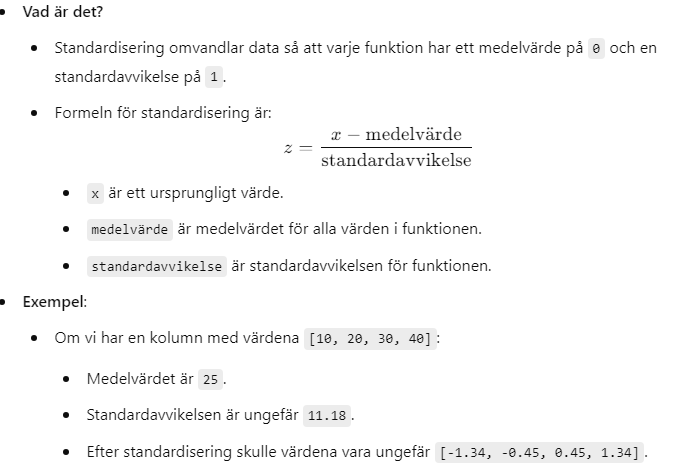 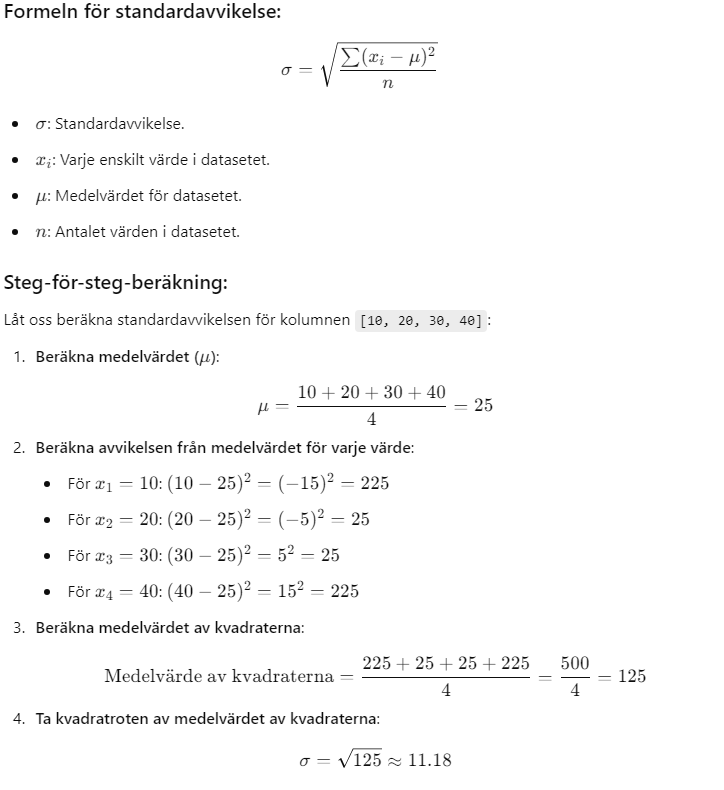

### När ska man använda det?

Standardisering används när data har en normalfördelning (eller nästan normal).
Det är särskilt användbart för algoritmer som förutsätter att data har samma skala, som Support Vector Machines (SVM), Logistisk regression, och K-means.
Standardisering gör också att gradientnedstigning fungerar snabbare och mer stabilt eftersom gradienterna blir mer balanserade.

2. Normalisering:

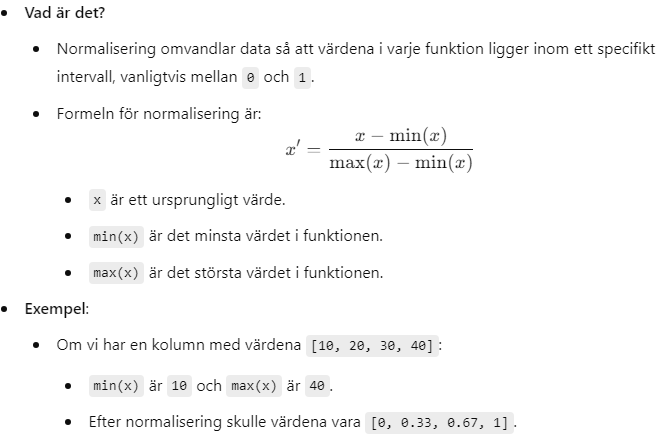 


### När ska man använda det?

Normalisering är användbart när data inte har en normalfördelning, eller när det finns outliers som kan påverka modellen.
Det används ofta för algoritmer som är avståndsbaserade, som k-NN (k-nearest neighbors) och neural networks.
För deep learning-modeller kan normalisering göra att gradientnedstigning konvergerar snabbare eftersom det reducerar skillnader i värdenas storlek.

3. Skillnader mellan standardisering och normalisering:

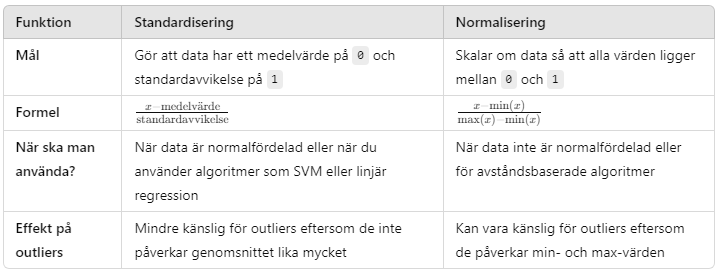
​
 
### Sammanfattning:

#### Standardisering 
är bra för att centrera data kring 0 och reducera spridningen till en enhetlig standardavvikelse, vilket gör att algoritmer kan arbeta mer effektivt.
#### Normalisering 
skalar om data till ett definierat intervall, vilket kan vara användbart för att säkerställa att alla funktioner bidrar lika mycket till modellen, särskilt när de har olika skalor eller när du använder avståndsbaserade metoder.
Båda teknikerna gör att modeller kan prestera bättre eftersom de minimerar påverkan av olika skalor i dina funktioner, men vilken du väljer beror på egenskaperna hos dina data och vilken modell du använder.

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Anpassar StandardScaler till träningsdatan och skalar om funktionerna från och med kolumn 3
# fit_transform beräknar medelvärdet och standardavvikelsen och skalar sedan om datan
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])

# Använder samma skalning på testdatan som beräknades på träningsdatan
# transform använder de beräknade värdena från träningsdatan för att skala om testdatan
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [18]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [19]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
